<a href="https://colab.research.google.com/github/Vahid-GitHub/Optimization/blob/master/scikit_learn_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Scikit-Lean optimization

In [2]:
import numpy as np
import scipy as sp
from sklearn import preprocessing, pipeline, linear_model, metrics, svm, gaussian_process
import matplotlib.pyplot as plt

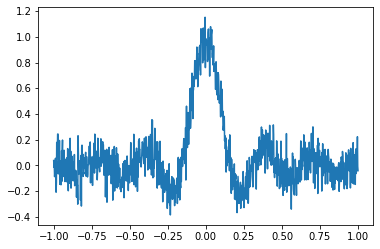

In [10]:
# making the function
ns = 1000
freq = 1
mu, std = 0, 0.1
t = np.linspace(-1, 1, ns)
# fun = np.sin(2*np.pi*freq*t) + (np.random.randn(ns) + mu) * std
fun = np.sinc(2*np.pi*freq*t) + (np.random.randn(ns) + mu) * std
plt.plot(t, fun)

MSE: 0.0786


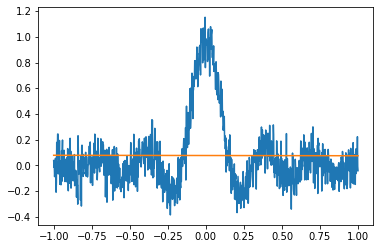

In [11]:
# linear
est = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDRegressor())
est.fit(t.reshape(-1, 1), fun)
fit_fun = est.predict(t.reshape(-1, 1))
plt.plot(t, fun)
plt.plot(t, fit_fun)
print(f'MSE: {metrics.mean_squared_error(fun, fit_fun):.4f}')

MSE: 0.0670
(1000, 6)


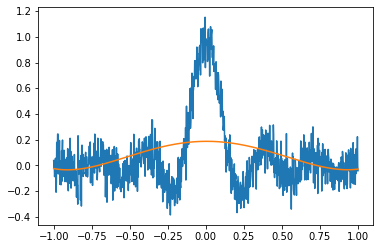

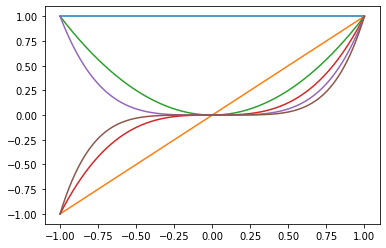

In [12]:
# single summation of fitting function
order = 5
t = t.reshape(-1, 1)

# add bias and higher orders polynomials
t_extended = np.ones((ns, 1))
for order in range(1, order+1, 1):
    t_extended = np.concatenate((t_extended, t**order), axis=1)

# # add bias and higher orders geometrical functions
# t_extended = np.ones((ns, 1))
# t_extended = np.concatenate((t_extended, t), axis=1)
# for order in range(1, order+1):
#     t_extended = np.concatenate((t_extended, np.sin(order*t), np.cos(order*t)), axis=1)

# # add bias and higher orders tanh functions
# t_extended = np.ones((ns, 1))
# t_extended = np.concatenate((t_extended, t), axis=1)
# for order in range(1, order+1, 1):
#     t_extended = np.concatenate((t_extended, np.tanh(order*t)), axis=1)

# # add bias and higher orders sinc functions
# t_extended = np.ones((ns, 1))
# t_extended = np.concatenate((t_extended, t), axis=1)
# for order in range(1, order+1):
#     t_extended = np.concatenate((t_extended, np.sinc(t-order/4), np.sinc(t+order/4)), axis=1)

est = pipeline.make_pipeline(preprocessing.StandardScaler(),
                             linear_model.SGDRegressor())
est.fit(t_extended, fun)
fit_fun = est.predict(t_extended)
plt.plot(t, fun)
plt.plot(t, fit_fun)
print(f'MSE: {metrics.mean_squared_error(fun, fit_fun):.4f}')
plt.figure()
print(t_extended.shape)
for ccol in range(t_extended.shape[1]):
  plt.plot(t, t_extended[:, ccol])

MSE: 0.0168
(1000, 11)


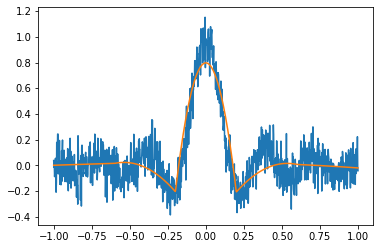

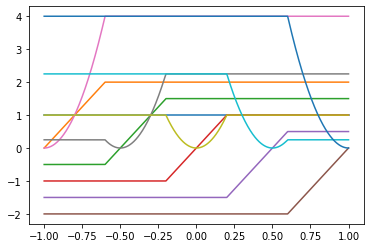

In [13]:
# summation of piece-wise functions
def pwfun(x, xshift, actfun=lambda x: x, tdomain=(-1, 1)):
  y = 0
  # if ((x - xshift) >= tdomain[0]) and ((x-xshift) <= tdomain[1]):
  #   y = actfun(x - xshift)
  # y = actfun(x - xshift) * ((x - xshift) >= tdomain[0]) * ((x - xshift) <= tdomain[1])
  y = actfun(x - xshift)
  y[(x - xshift) < tdomain[0]] = actfun(tdomain[0])
  y[(x - xshift) > tdomain[1]] = actfun(tdomain[1])
  return(y)

order = 2
nstep = 5
t = t.reshape(-1, 1)

# # add bias and higher orders polynomials
# t_extended = np.ones((ns, 1))
# for order in range(1, order+1, 1):
#   for step in np.linspace(t.min(), t.max(), nstep):
#     t_extended = np.concatenate((t_extended,
#                                  pwfun(t, step, actfun=lambda x: x**order,
#                                        tdomain=(t.min(), t.max()))), 
#                                  axis=1)

# add bias and higher orders polynomials
t_extended = np.ones((ns, 1))
for order in range(1, order+1, 1):
  for step in np.linspace(t.min(), t.max(), nstep):
    t_extended = np.concatenate((t_extended,
                                 pwfun(t, step, actfun=lambda x: (x*nstep)**order,
                                       tdomain=((t.min()-step)/nstep, 
                                                (t.max()-step)/nstep))), 
                                 axis=1)

# # add bias and higher orders geometrical functions
# t_extended = np.ones((ns, 1))
# t_extended = np.concatenate((t_extended, t), axis=1)
# for order in range(1, order+1):
#     t_extended = np.concatenate((t_extended, np.sin(order*t), np.cos(order*t)), axis=1)

# # add bias and higher orders tanh functions
# t_extended = np.ones((ns, 1))
# t_extended = np.concatenate((t_extended, t), axis=1)
# for order in range(1, order+1, 1):
#     t_extended = np.concatenate((t_extended, np.tanh(order*t)), axis=1)

est = pipeline.make_pipeline(preprocessing.StandardScaler(),
                             linear_model.SGDRegressor())
est.fit(t_extended, fun)
fit_fun = est.predict(t_extended)
plt.plot(t, fun)
plt.plot(t, fit_fun)
print(f'MSE: {metrics.mean_squared_error(fun, fit_fun):.4f}')
plt.figure()
print(t_extended.shape)
for ccol in range(t_extended.shape[1]):
  plt.plot(t, t_extended[:, ccol])

MSE: 0.0292
(1000, 11)


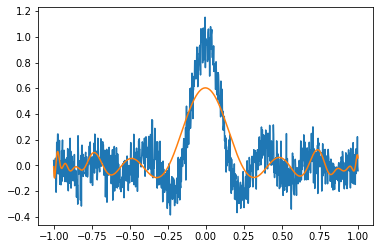

In [14]:
# support vector regression
order = 10
t = t.reshape(-1, 1)

# add bias and higher orders polynomials
t_extended = np.ones((ns, 1))
for order in range(1, order+1, 1):
    t_extended = np.concatenate((t_extended, t**order), axis=1)

svr = pipeline.make_pipeline(preprocessing.StandardScaler(), 
                             svm.SVR(kernel='rbf', degree=3, C=1000, epsilon=0.1))
svr.fit(t_extended, fun)
fit_fun = svr.predict(t_extended)
plt.plot(t, fun)
plt.plot(t, fit_fun)
print(f'MSE: {metrics.mean_squared_error(fun, fit_fun):.4f}')
print(t_extended.shape)
# plt.figure()
# for ccol in range(t_extended.shape[1]):
#   plt.plot(t, t_extended[:, ccol])

MSE: 0.0121
(1000, 11)


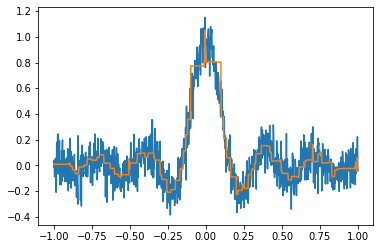

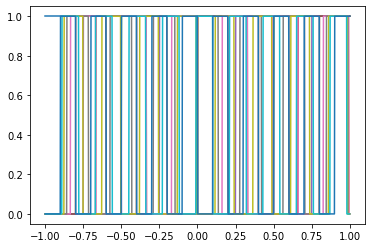

In [15]:
# support vector regression with Haar-like functions
order = 20
t = t.reshape(-1, 1)

def hfunc(t, order):
  y = np.zeros((t.size, 1))
  scale = t.size // order
  s = 0
  for c in range(1, scale):
    y[scale*(c-1):scale*c] = s
    s = 1 - s
  return(y)

# add bias and higher orders Haar-like functions
t_extended = np.ones((ns, 1))
for ord in range(2, order+1, 2):
    t_extended = np.concatenate((t_extended, hfunc(t, ord)), axis=1)

svr = pipeline.make_pipeline(preprocessing.StandardScaler(), 
                             svm.SVR(kernel='rbf', degree=3, C=1000, epsilon=0.1))
svr.fit(t_extended, fun)
fit_fun = svr.predict(t_extended)
plt.plot(t, fun)
plt.plot(t, fit_fun)
print(f'MSE: {metrics.mean_squared_error(fun, fit_fun):.4f}')
plt.figure()
print(t_extended.shape)
for ccol in range(t_extended.shape[1]):
  # plt.figure()
  plt.plot(t, t_extended[:, ccol])

MSE: 0.0097
(1000, 10)


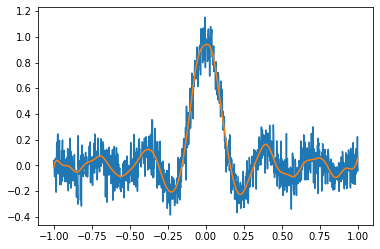

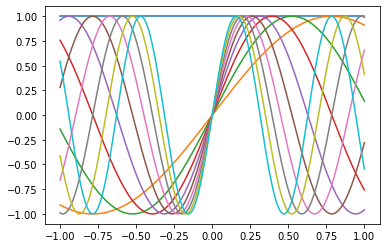

In [16]:
# support vector regression with geometrical functions
order = 10
t = t.reshape(-1, 1)

# add bias and higher orders geometrical functions
t_extended = np.ones((ns, 1))
for ord in range(2, order+1, 1):
    t_extended = np.concatenate((t_extended, np.sin(ord*t)), axis=1)

svr = pipeline.make_pipeline(preprocessing.StandardScaler(), 
                             svm.SVR(kernel='rbf', degree=3, C=1000, epsilon=0.1))
svr.fit(t_extended, fun)
fit_fun = svr.predict(t_extended)
plt.plot(t, fun)
plt.plot(t, fit_fun)
print(f'MSE: {metrics.mean_squared_error(fun, fit_fun):.4f}')
plt.figure()
print(t_extended.shape)
for ccol in range(t_extended.shape[1]):
  # plt.figure()
  plt.plot(t, t_extended[:, ccol])

MSE: 0.009657


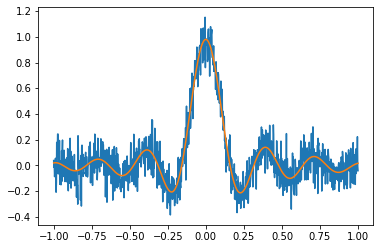

In [18]:
# Gaussian regressor
order = 10
t = t.reshape(-1, 1)

# # add bias and higher orders polynomials
# t_extended = np.ones((ns, 1))
# for order in range(1, order+1, 1):
#   t_extended = np.concatenate((t_extended, t**order), axis=1)

kernel = gaussian_process.kernels.RBF(length_scale=0.01) + gaussian_process.kernels.WhiteKernel()
gpr = gaussian_process.GaussianProcessRegressor(kernel=kernel, random_state=0).fit(t, fun)
gpr.score(t, fun)
fit_fun = gpr.predict(t, return_std=False)
slc = slice(0, t.size)
plt.plot(t[slc], fun[slc])
plt.plot(t[slc], fit_fun[slc])
print(f'MSE: {metrics.mean_squared_error(fun, fit_fun):.6f}')
# plt.figure()
# print(t_extended.shape)
# for ccol in range(t_extended.shape[1]):
#   # plt.figure()
#   plt.plot(t, t_extended[:, ccol])